In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os
import sys

In [5]:
resdir = '../results/'

In [7]:
[f for f in os.listdir(resdir) if 'tree' in f]

['qm7b_tree.pkl', 'qm9_tree.pkl']

In [9]:
with open(f'{resdir}qm9_tree_cm.pkl', 'rb') as inf:
    res_qm9_cm = pickle.load(inf)
    
with open(f'{resdir}qm9_tree_bob.pkl', 'rb') as inf:
    res_qm9_bob = pickle.load(inf)
    
with open(f'{resdir}qm9_tree_slatm.pkl', 'rb') as inf:
    res_qm9_slatm = pickle.load(inf)
    
with open(f'{resdir}qm7b_tree_cm.pkl', 'rb') as inf:
    res_qm7b_cm = pickle.load(inf)
    
with open(f'{resdir}qm7b_tree_bob.pkl', 'rb') as inf:
    res_qm7b_bob = pickle.load(inf)
    
with open(f'{resdir}qm7b_tree_slatm.pkl', 'rb') as inf:
    res_qm7b_slatm = pickle.load(inf)

In [10]:
res_qm9_cm.keys()

dict_keys(['seed', 'train_sizes', 'classifier', 1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000])

In [11]:
train_sizes_qm9 = res_qm9_cm['train_sizes']

score_qm9_cm = []
score_qm9_bob = []
score_qm9_slatm = []
for ts in train_sizes_qm9:
    score_qm9_cm.append(res_qm9_cm[ts]['score'])
    score_qm9_bob.append(res_qm9_bob[ts]['score'])
    score_qm9_slatm.append(res_qm9_slatm[ts]['score'])

In [12]:
score_qm9_cm

[0.5757158445272228,
 0.60084922470334,
 0.702275089502252,
 0.7706954760297097,
 0.845781906094923,
 0.8677135986651617,
 0.909265221435215,
 0.9284621920135939]

In [13]:
def plot_score(train_sizes, score_list, label_list, yticks, xtick_labels, 
               save=False, filename='plot.svg'):
    
    fs = 16.
    
    fig = plt.figure(figsize=(4.8, 4.8), dpi=200)
    ax = fig.add_subplot(111)
    
    marker_list = ['o', 's', 'd', '^', 'v']
    for i, (score, label, marker) in enumerate(zip(score_list, label_list, marker_list)):
        ax.plot(train_sizes, score, label=label, marker=marker, lw=2., ms=10.)
        
    ax.legend(frameon=False, fontsize=fs)
    
    ax.set_xlabel('# training samples', fontsize=fs)
    ax.set_ylabel('Score', fontsize=fs)
    
    ax.set_ylim(top=1.)
    
    ax.set_yticks(yticks)
    ax.set_xscale('log')
    
    ax.set_xticks(train_sizes)
    ax.set_xticklabels(xtick_labels)
    ax.minorticks_off()
    ax.tick_params(axis='both', labelsize=fs, direction='in', length=5., width=2.)
    ax.tick_params(axis='x')
    
    for side, sp in ax.spines.items():
        sp.set_linewidth(2.)
        
    if save:
        plt.savefig(filename, bbox_inches='tight')
        
    return

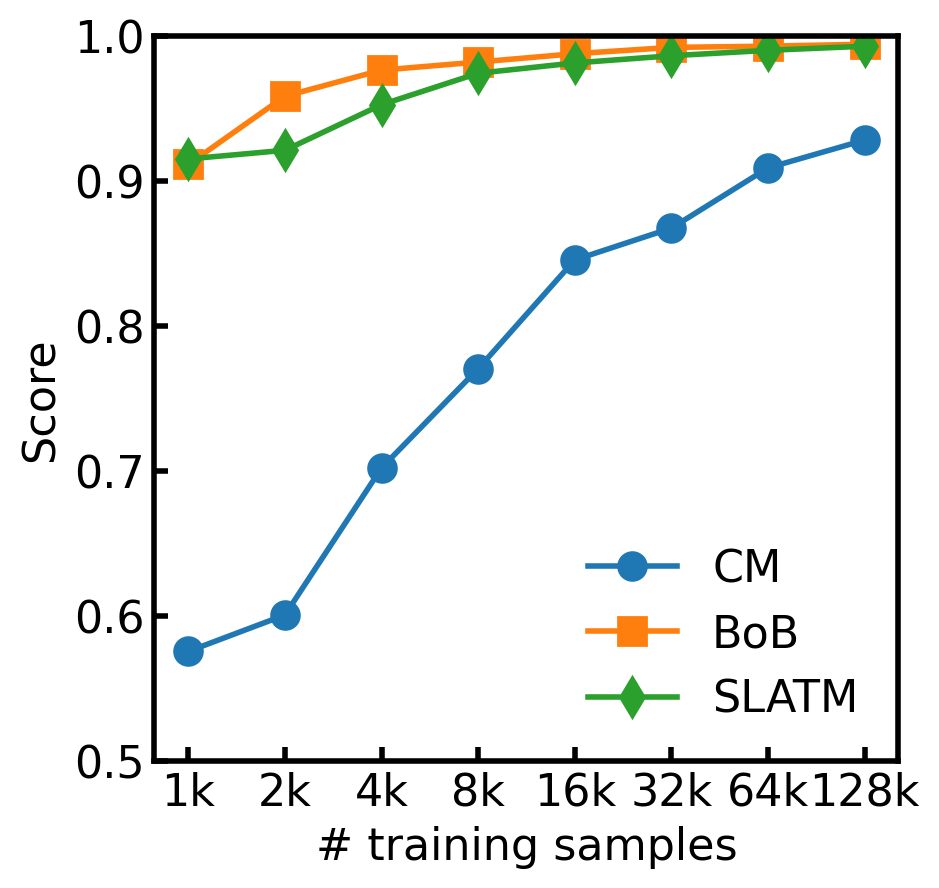

In [14]:
yticks_qm9 = [0.50, 0.60, 0.70, 0.80, 0.90, 1.0]
xtick_labels = ['1k', '2k', '4k', '8k', '16k', '32k', '64k', '128k']
labels = ['CM', 'BoB', 'SLATM']
score_list_qm9 = [score_qm9_cm, score_qm9_bob, score_qm9_slatm]
plot_score(train_sizes_qm9, score_list_qm9, labels, yticks_qm9, xtick_labels, 
           save=False, filename='figures/tmp/qm9_labels_3_pred_score.svg')

In [15]:
res_qm7b_bob[100].keys()

dict_keys(['score', 'labels_pred'])

In [16]:
train_sizes_qm7b = res_qm7b_cm['train_sizes']

score_qm7b_cm = []
score_qm7b_bob = []
score_qm7b_slatm = []
for ts in train_sizes_qm7b:
    score_qm7b_cm.append(res_qm7b_cm[ts]['score'])
    score_qm7b_bob.append(res_qm7b_bob[ts]['score'])
    score_qm7b_slatm.append(res_qm7b_slatm[ts]['score'])

In [17]:
score_qm7b_cm

[0.540289692026438,
 0.5311653116531165,
 0.5706944648362943,
 0.6222118234284822,
 0.6608447692033506,
 0.7270007479431563,
 0.7755856966707768]

In [18]:
train_sizes_qm7b

array([ 100,  200,  400,  800, 1600, 3200, 6400])

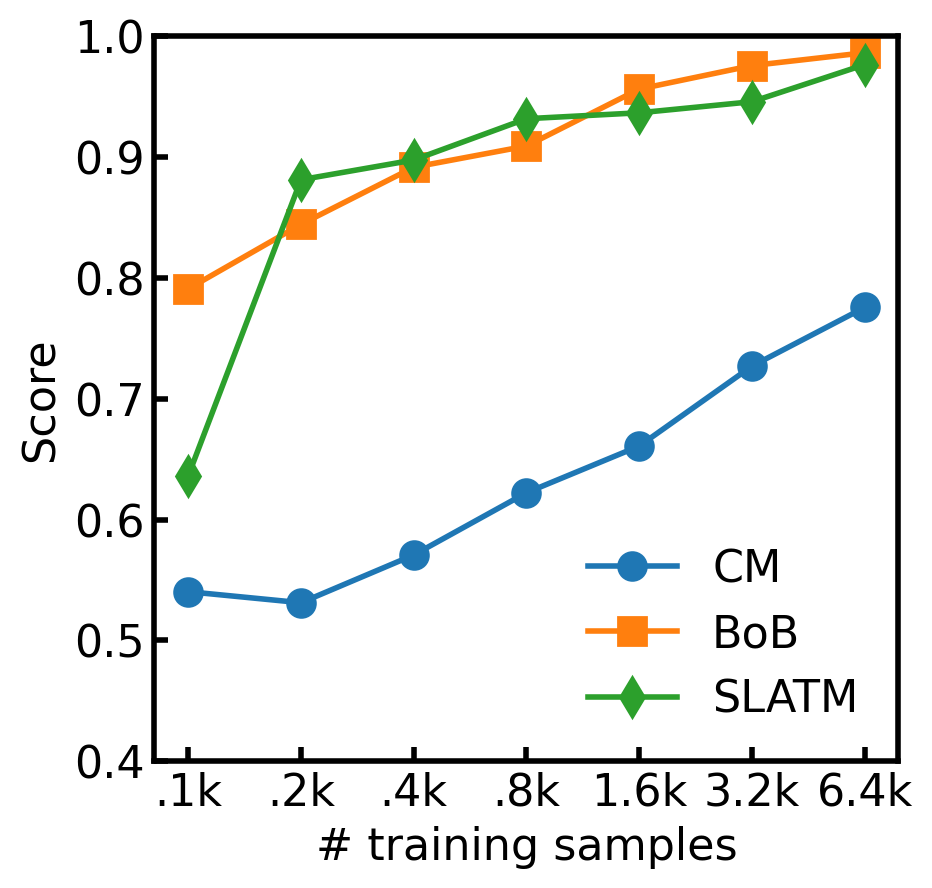

In [19]:
yticks_qm7b = [0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.0]
xtick_labels_qm7b = ['.1k', '.2k', '.4k', '.8k', '1.6k', '3.2k', '6.4k']
labels = ['CM', 'BoB', 'SLATM']
score_list_qm7b = [score_qm7b_cm, score_qm7b_bob, score_qm7b_slatm]
plot_score(train_sizes_qm7b, score_list_qm7b, labels, yticks_qm7b, xtick_labels_qm7b, 
           save=False, filename='figures/tmp/qm7b_labels_2_pred_score.svg')

In [20]:
?plot_score

Signature:
plot_score(
    train_sizes,
    score_list,
    label_list,
    yticks,
    xtick_labels,
    save=False,
    filename='plot.svg',
)
Docstring: <no docstring>
File:      ~/repos/MolClass_HOMO_LUMO/notebooks/<ipython-input-13-ab1f9e37cd05>
Type:      function


In [21]:
def gridplot_score(train_sizes_qm9, score_list_qm9, x_tick_labels_qm9, 
                   train_sizes_qm7b, score_list_qm7b, x_tick_labels_qm7b, yticks, label_list, 
                   save=False, filename='figure.svg'):
    
    fs = 16.
    
    fig = plt.figure(figsize=(7.2, 3.6), dpi=200)
    axs = fig.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'wspace': 0.1})
    
    marker_list = ['o', 's', 'd', '^', 'v']
    color_list = ['purple', 'turquoise', 'gold', 'magenta', 'chocolate']
    
    for ax in axs:
        ax.set_xscale('log')
    
    for i, (score, label, marker) in enumerate(zip(score_list_qm9, label_list, marker_list)):
        axs[0].plot(train_sizes_qm9, score, color=color_list[i], label=label, marker=marker, lw=2., ms=10.)
        
    axs[0].legend(frameon=False, fontsize=fs, ncol=3, loc='center', 
                  bbox_to_anchor=(0.50, 0.95), bbox_transform=fig.transFigure)
    
    axs[0].set_xlabel(r'$N_{\mathrm{tr}} / 1000$', fontsize=fs)
    axs[0].set_ylabel('Score', fontsize=fs)
    
    axs[0].set_yticks(yticks)
    axs[0].set_yticklabels(yticks)
    
    axs[0].set_xticks(train_sizes_qm9)
    axs[0].set_xticklabels(x_tick_labels_qm9)

    axs[0].text(0.65, 0.1, 'QM9', fontsize=fs, transform=axs[0].transAxes)
        
    for i, (score, marker) in enumerate(zip(score_list_qm7b, marker_list)):
        axs[1].plot(train_sizes_qm7b, score, color=color_list[i], marker=marker, lw=2., ms=10.)
    
    axs[1].set_xlabel(r'$N_{\mathrm{tr}} / 100$', fontsize=fs)
    
    axs[1].set_xticks(train_sizes_qm7b)
    axs[1].set_xticklabels(x_tick_labels_qm7b)
    
    axs[1].text(0.6, 0.1, 'QM7b', fontsize=fs, transform=axs[1].transAxes)
        
    for ax in axs:
        ax.grid()
        ax.set_ylim(top=1.)
        ax.minorticks_off()
        ax.tick_params(axis='both', labelsize=fs, direction='in', length=5., width=2.)
        for side, sp in ax.spines.items():
            sp.set_linewidth(2.)
        
    if save:
        plt.savefig(filename, bbox_to_inches='tight')
        
    return

In [22]:
x_tick_labels_qm9 = ['1', '2', '4', '8', '16', '32', '64', '128']
x_tick_labels_qm7b = ['1', '2', '4', '8', '16', '32', '64']

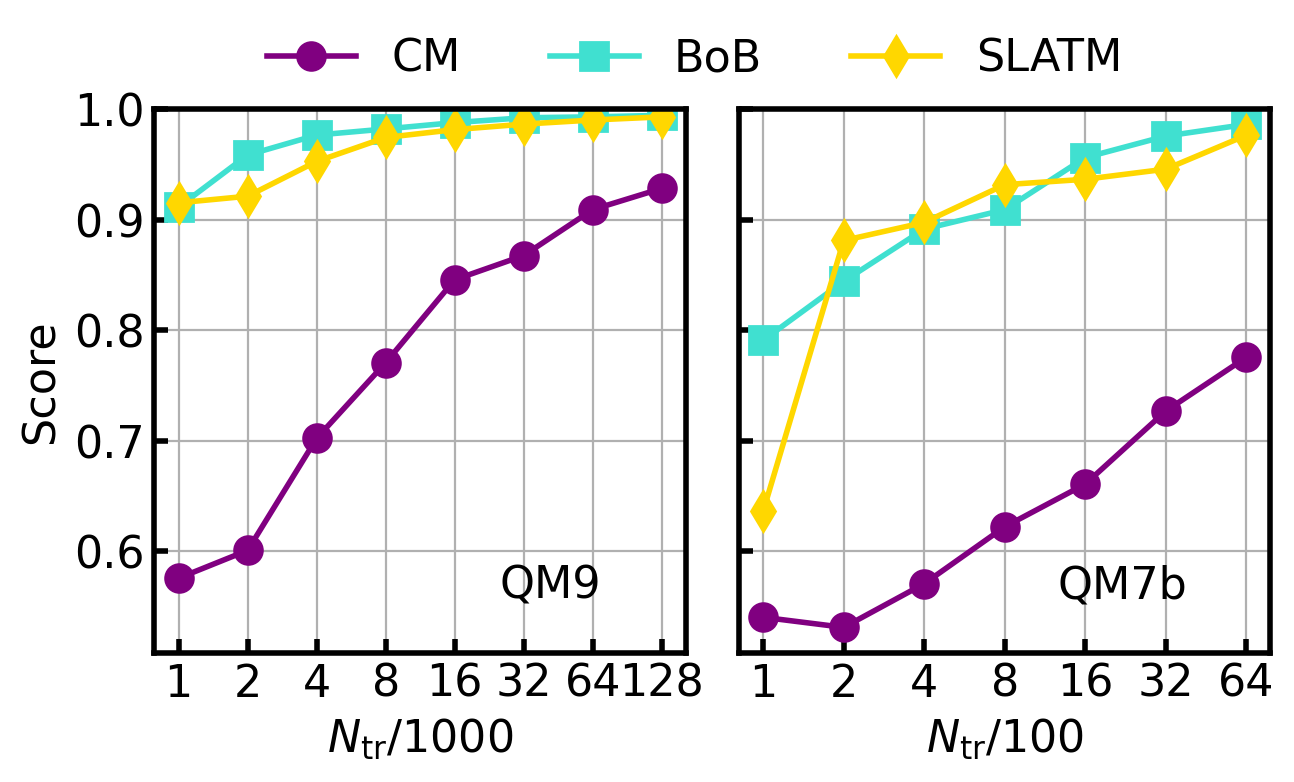

In [23]:
gridplot_score(train_sizes_qm9, score_list_qm9, x_tick_labels_qm9, train_sizes_qm7b, score_list_qm7b, 
               x_tick_labels_qm7b, yticks_qm7b, 
               labels, save=False, filename='figures/tmp/score_qm9_qm7b_dtc.svg')